# Inroduction to Convolutional Neural Networks and Computer Vision with TensorFlow
* **Computer Vision :** is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self_driving car recognizing the car in front


# Get the data

The images we are working with are from the food101 dataset

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-09-03 14:57:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 172.217.212.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   167MB/s    in 0.6s    

2023-09-03 14:57:29 (167 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data.

* And for a computer vision project... this usually means visualizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .")

There are 2 directories and 0 images in pizza_steak .
There are 2 directories and 0 images in pizza_steak/test .
There are 0 directories and 250 images in pizza_steak/test/steak .
There are 0 directories and 250 images in pizza_steak/test/pizza .
There are 2 directories and 0 images in pizza_steak/train .
There are 0 directories and 750 images in pizza_steak/train/steak .
There are 0 directories and 750 images in pizza_steak/train/pizza .


In [6]:
!ls pizza_steak

test  train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [8]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# let's visualize the our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we will view images from here)
  target_folder=target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder +"/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape : {img.shape}") # show the shape of the image

  return img

Image shape : (512, 512, 3)


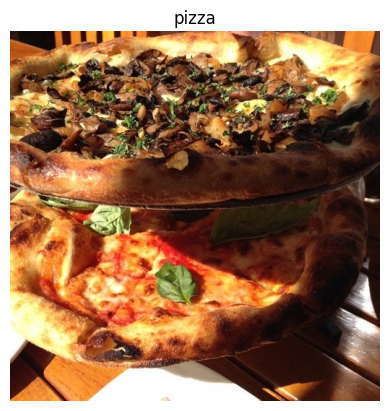

In [10]:
# view a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [11]:
img # this is a actually np array

array([[[ 33,  18,  13],
        [ 36,  21,  16],
        [ 38,  23,  18],
        ...,
        [106,  62,  49],
        [ 95,  57,  44],
        [ 99,  63,  51]],

       [[ 37,  19,  15],
        [ 36,  21,  14],
        [ 40,  22,  18],
        ...,
        [105,  61,  48],
        [ 96,  58,  45],
        [ 99,  63,  51]],

       [[ 39,  20,  14],
        [ 38,  21,  13],
        [ 40,  21,  15],
        ...,
        [104,  62,  48],
        [100,  60,  48],
        [ 99,  61,  48]],

       ...,

       [[140,  54,   3],
        [185, 100,  43],
        [240, 152,  88],
        ...,
        [ 81,  34,  18],
        [ 80,  33,  17],
        [ 80,  33,  17]],

       [[215, 120,  40],
        [255, 170,  88],
        [247, 152,  70],
        ...,
        [ 81,  34,  18],
        [ 79,  32,  16],
        [ 78,  31,  15]],

       [[255, 157,  63],
        [245, 146,  52],
        [245, 146,  55],
        ...,
        [ 83,  36,  20],
        [ 81,  34,  18],
        [ 80,  33,  17]]

In [12]:
# we can convert it into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 33,  18,  13],
        [ 36,  21,  16],
        [ 38,  23,  18],
        ...,
        [106,  62,  49],
        [ 95,  57,  44],
        [ 99,  63,  51]],

       [[ 37,  19,  15],
        [ 36,  21,  14],
        [ 40,  22,  18],
        ...,
        [105,  61,  48],
        [ 96,  58,  45],
        [ 99,  63,  51]],

       [[ 39,  20,  14],
        [ 38,  21,  13],
        [ 40,  21,  15],
        ...,
        [104,  62,  48],
        [100,  60,  48],
        [ 99,  61,  48]],

       ...,

       [[140,  54,   3],
        [185, 100,  43],
        [240, 152,  88],
        ...,
        [ 81,  34,  18],
        [ 80,  33,  17],
        [ 80,  33,  17]],

       [[215, 120,  40],
        [255, 170,  88],
        [247, 152,  70],
        ...,
        [ 81,  34,  18],
        [ 79,  32,  16],
        [ 78,  31,  15]],

       [[255, 157,  63],
        [245, 146,  52],
        [245, 146,  55],
        ...,
        [ 83,  36,  2

In [13]:
# view the images shape
img.shape # returns width, length, colour channels

(512, 512, 3)

In [14]:
# get all the pixel values between 0 & 1
img/255

array([[[0.12941176, 0.07058824, 0.05098039],
        [0.14117647, 0.08235294, 0.0627451 ],
        [0.14901961, 0.09019608, 0.07058824],
        ...,
        [0.41568627, 0.24313725, 0.19215686],
        [0.37254902, 0.22352941, 0.17254902],
        [0.38823529, 0.24705882, 0.2       ]],

       [[0.14509804, 0.0745098 , 0.05882353],
        [0.14117647, 0.08235294, 0.05490196],
        [0.15686275, 0.08627451, 0.07058824],
        ...,
        [0.41176471, 0.23921569, 0.18823529],
        [0.37647059, 0.22745098, 0.17647059],
        [0.38823529, 0.24705882, 0.2       ]],

       [[0.15294118, 0.07843137, 0.05490196],
        [0.14901961, 0.08235294, 0.05098039],
        [0.15686275, 0.08235294, 0.05882353],
        ...,
        [0.40784314, 0.24313725, 0.18823529],
        [0.39215686, 0.23529412, 0.18823529],
        [0.38823529, 0.23921569, 0.18823529]],

       ...,

       [[0.54901961, 0.21176471, 0.01176471],
        [0.7254902 , 0.39215686, 0.16862745],
        [0.94117647, 0

**NOTE :** As we have discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value)

## An end-to-end example

Let's build a neural network to find patterns in our images, more specifically we need a way to :
* Load our images
* Preprocces our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [15]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from keras.layers.serialization import activation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data (get all of pixel values between 0 & 1),also called as scaling
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                               )

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=32
                                               )

# Build a CNN model (same as the Tiny VGG on the CNN explaniner website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)
                           ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"
                              ),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 165ms/step - loss: 0.5870 - accuracy: 0.7013 - val_loss: 0.3993 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4527 - accuracy: 0.7980 - val_loss: 0.3496 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4248 - accuracy: 0.8087 - val_loss: 0.3845 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3677 - accuracy: 0.8453 - val_loss: 0.3306 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.3470 - accuracy: 0.8560 - val_loss: 0.3354 - val_accuracy: 0.8600


Since we've already fit a model, let's check out its architecture.

In [16]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.


Using the same model as before
To examplify how neural networks can be adapted to many different problems, let's see how a binary classification model we've previously built might work with our data.

We can use all of the same parameters in our previous model except for changing two things:

The data - we're now working with images instead of dots.
The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 6s 104ms/step - loss: 0.7367 - accuracy: 0.4993 - val_loss: 0.7411 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.7136 - accuracy: 0.4960 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6985 - accuracy: 0.5173 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 133ms/step - loss: 0.7093 - accuracy: 0.5080 - val_loss: 0.6952 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6980 - accuracy: 0.4907 - val_loss: 0.6956 - val_accuracy: 0.5000


Now we have seen what augmented training looks like, let'S build a model and see how it works and learns


Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.

In [18]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

🔑 Note: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 133ms/step - loss: 2.7109 - accuracy: 0.6180 - val_loss: 3.7279 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 5s 101ms/step - loss: 1.0091 - accuracy: 0.7080 - val_loss: 0.4383 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.6388 - accuracy: 0.7533 - val_loss: 1.2436 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 5s 105ms/step - loss: 0.7440 - accuracy: 0.7320 - val_loss: 0.7075 - val_accuracy: 0.7400
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5279 - accuracy: 0.7727 - val_loss: 0.6754 - val_accuracy: 0.6920


In [20]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________



## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
Repeat until satisfied
* Let's step through each.


## 1. Import and become one with the data

In [21]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

Image shape : (512, 512, 3)
Image shape : (512, 384, 3)


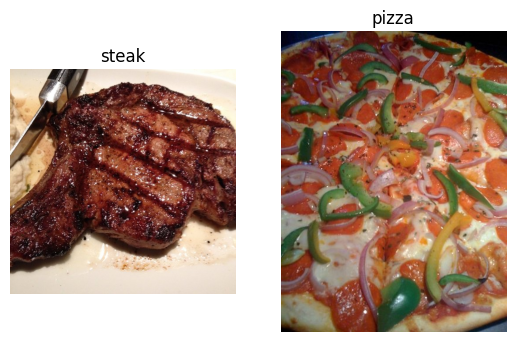

In [22]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for a model)

In [23]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

In [25]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.



Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
The target_size parameter defines the input size of our images in (height, width) format.
The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.
We can take a look at our batched images and labels by inspecting the train_data object.

In [26]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [27]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.9607844 , 0.94117653, 0.9176471 ],
          [0.96470594, 0.9450981 , 0.9215687 ],
          [0.96470594, 0.95294124, 0.92549026],
          ...,
          [0.7843138 , 0.8588236 , 0.882353  ],
          [0.7725491 , 0.854902  , 0.8745099 ],
          [0.7725491 , 0.85098046, 0.87843144]],
 
         [[0.9607844 , 0.94117653, 0.9176471 ],
          [0.96470594, 0.9450981 , 0.9215687 ],
          [0.96470594, 0.95294124, 0.92549026],
          ...,
          [0.7803922 , 0.854902  , 0.882353  ],
          [0.7725491 , 0.85098046, 0.8862746 ],
          [0.7686275 , 0.8470589 , 0.882353  ]],
 
         [[0.9607844 , 0.94117653, 0.9176471 ],
          [0.96470594, 0.9450981 , 0.9215687 ],
          [0.96470594, 0.95294124, 0.92549026],
          ...,
          [0.7843138 , 0.854902  , 0.90196085],
          [0.7803922 , 0.85098046, 0.8980393 ],
          [0.7725491 , 0.85098046, 0.8941177 ]],
 
         ...,
 
         [[0.10980393, 0.07843138, 0.06666667],
          [0.09411

In [28]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

## 3. Create a model (start with a baseline)

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Great! We've got a simple convolutional neural network architecture ready to go.

* Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output


Great! We've got a simple convolutional neural network architecture ready to go.

And it follows the typical CNN structure of:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
Let's discuss some of the components of the Conv2D layer:

* The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.
* filters - these are the number of "feature extractors" that will be moving over our images.
* kernel_size - the size of our filters, for example, a kernel_size of (3, 3) (or just 3) will mean each filter will have the size 3x3, meaning it will look at a space of 3x3 pixels each time. The smaller the kernel, the more fine-grained features it will extract.
* stride - the number of pixels a filter will move across as it covers the image. A stride of 1 means the filter moves across each pixel 1 by 1. A stride of 2 means it moves 2 pixels at a time.
* padding - this can be either 'same' or 'valid', 'same' adds zeros the to outside of the image so the resulting output of the convolutional layer is the same as the input, where as 'valid' (default) cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel size of 3 (224/3 = 74.6) means a single pixel will get cut off the end.

In [31]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

## 4. Fit a model

Our model is compiled, time to fit it.

You'll notice two new parameters here:

steps_per_epoch - this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)
validation_steps - same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [32]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 0.7985 - accuracy: 0.7080 - val_loss: 0.4192 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4029 - accuracy: 0.8247 - val_loss: 0.3829 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 7s 141ms/step - loss: 0.2463 - accuracy: 0.9187 - val_loss: 0.4137 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 5s 112ms/step - loss: 0.0931 - accuracy: 0.9773 - val_loss: 0.4202 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.0340 - accuracy: 0.9940 - val_loss: 0.5078 - val_accuracy: 0.8280


## 5. Evaluate the model


Oh yeah! Looks like our model is learning something.

Let's check out its training curves.



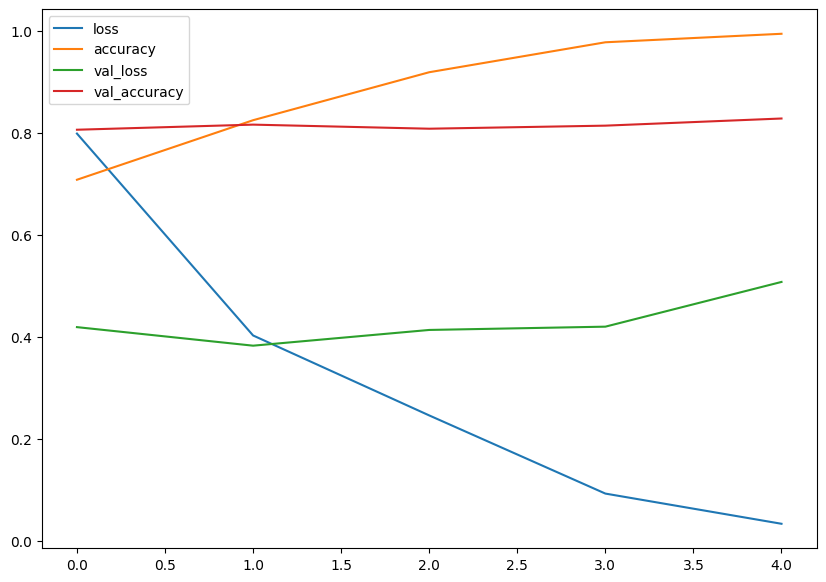

In [34]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [35]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

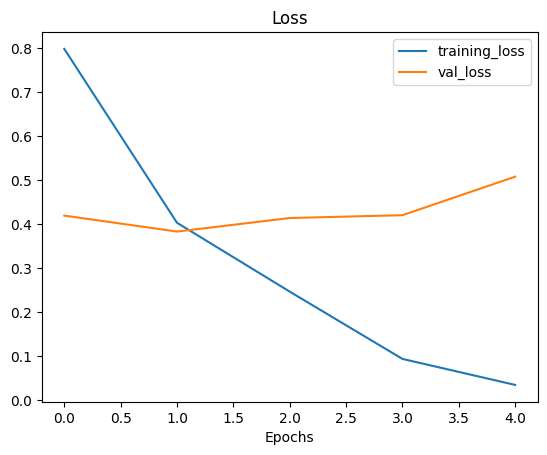

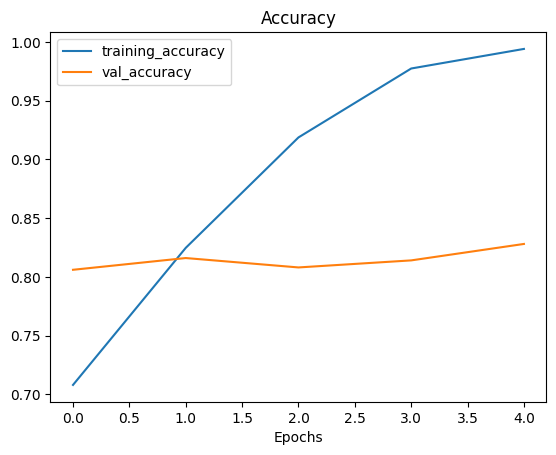

In [36]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)


The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [37]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps: 0. Create a basline.

Beat the baseline by overfitting a larger model.
Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

Increase the number of convolutional layers.
Increase the number of convolutional filters.
Add another dense layer to the output of our flattened layer.
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

A ConvNet with max pooling
A ConvNet with max pooling and data augmentation
For the first model, we'll follow the modified basic CNN structure:

Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
Let's built it. It'll have the same structure as model_4 but with a MaxPool2D() layer after each convolutional layer.

In [38]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])


Woah, we've got another layer type we haven't seen before.

If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment

In [39]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 0.6127 - accuracy: 0.6480 - val_loss: 0.4982 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4798 - accuracy: 0.7767 - val_loss: 0.3872 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 180ms/step - loss: 0.4329 - accuracy: 0.8060 - val_loss: 0.3741 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.4104 - accuracy: 0.8253 - val_loss: 0.4381 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3849 - accuracy: 0.8333 - val_loss: 0.3192 - val_accuracy: 0.8640



Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [41]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      


Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.

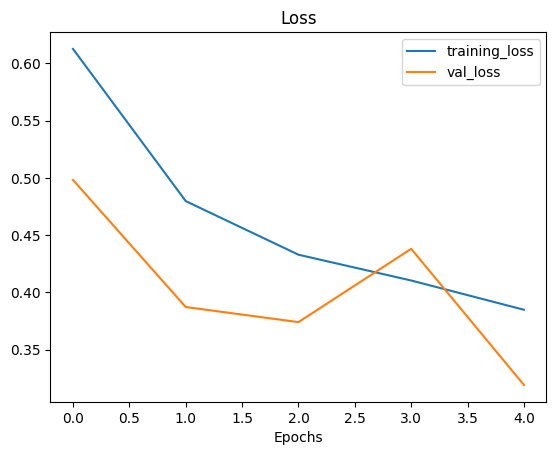

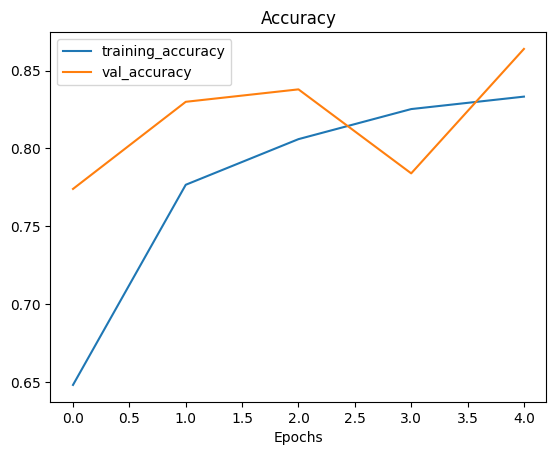

In [42]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)


Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ImageDataGenerator instances.

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

In [44]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [45]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

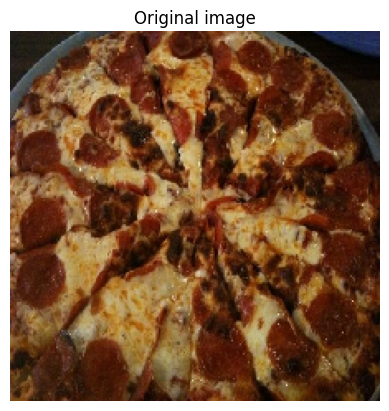

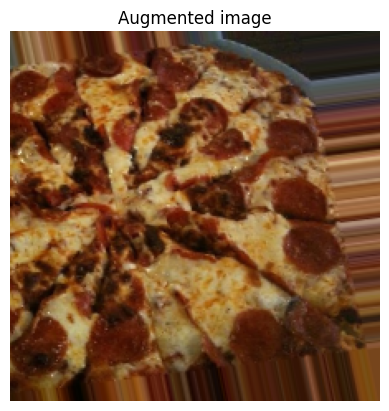

In [46]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.

In [47]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 451ms/step - loss: 0.6770 - accuracy: 0.6347 - val_loss: 0.8417 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 20s 421ms/step - loss: 0.7260 - accuracy: 0.4580 - val_loss: 0.6843 - val_accuracy: 0.6220
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6800 - accuracy: 0.5913 - val_loss: 0.6594 - val_accuracy: 0.6800
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6823 - accuracy: 0.6240 - val_loss: 0.6644 - val_accuracy: 0.5160
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.6651 - accuracy: 0.5893 - val_loss: 0.5848 - val_accuracy: 0.7320


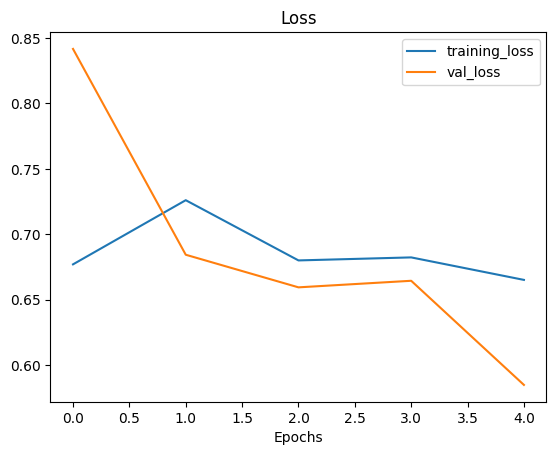

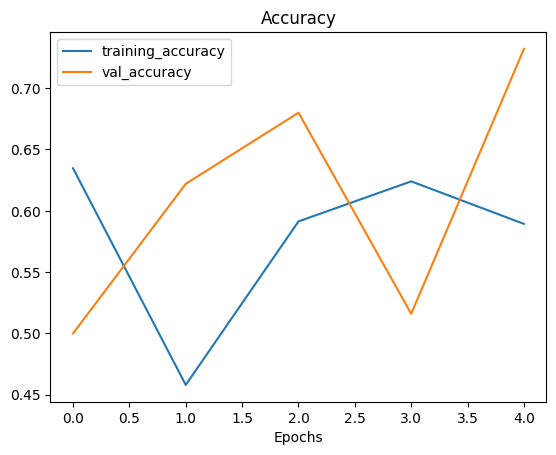

In [48]:
# Check out model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [49]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 448ms/step - loss: 0.6470 - accuracy: 0.6247 - val_loss: 0.4813 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 22s 457ms/step - loss: 0.5418 - accuracy: 0.7373 - val_loss: 0.4643 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5275 - accuracy: 0.7593 - val_loss: 0.4151 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5241 - accuracy: 0.7480 - val_loss: 0.4449 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.5060 - accuracy: 0.7707 - val_loss: 0.4396 - val_accuracy: 0.8040


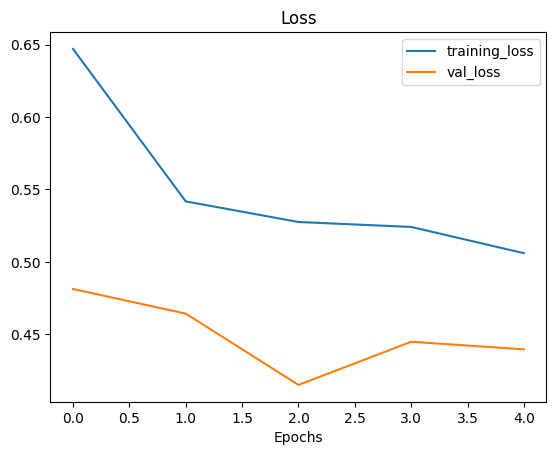

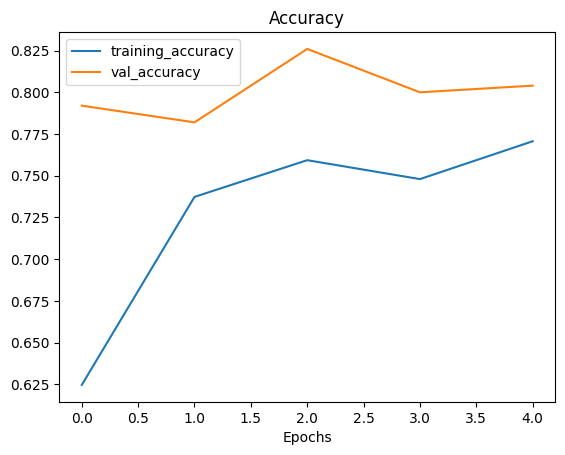

In [51]:
# Plot loss curves
plot_loss_curves(history_7)

**Note :** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (ın our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we have already beaten our baseline, there are a few things we could try to continue to improve our model

* Inrease the number of layers
* Increase the number of filters
* Train for longer
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own case

## Making a prediction with our trained model on our own custom data

(-0.5, 3023.5, 4031.5, -0.5)

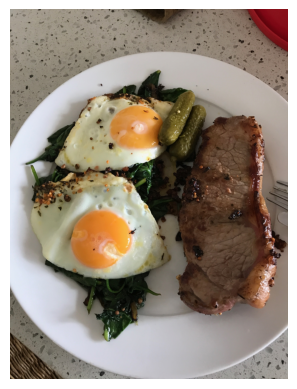

In [52]:
steak=mpimg.imread("/content/drive/MyDrive/Data/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [53]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [54]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [55]:
expanded_steak=tf.expand_dims(steak,axis=0)

**Note :** When you a train a neural network and you want to make a prediction with it on yourn own custom data, it is important than your custom data (or new data) is preprocessed into the sam format as the data your model was trained on

In [56]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channel )
  """

  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_jpeg(img)
  # resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  # Rescale the image (get all values between 0 & 1)
  img=img/255.

  return img

In [57]:
# Load in and preprocess our custom image
steak = load_and_prep_image("/content/drive/MyDrive/Data/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [58]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 242ms/step


array([[0.9009948]], dtype=float32)

Looks like our custom image is being put through our model. However, it currently outputs a prediction probability, would not it be nice if we coul visualize the image as well as the model's prediction?

In [59]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [60]:
# we can index the predicted class by rounding the prediction probability and indexing on the class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [61]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 26ms/step


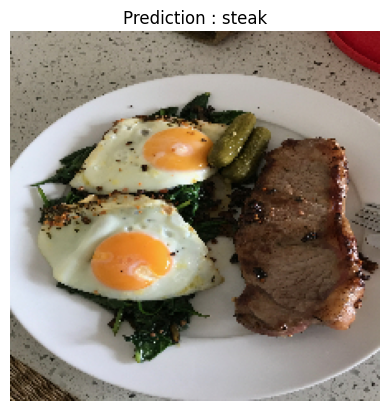

In [62]:
# Test our model on a custom image
pred_and_plot(model_7,"/content/drive/MyDrive/Data/03-steak.jpeg")

Our model works! Let's try it on another image... This time pizza

1/1 [==============================] - 0s 28ms/step


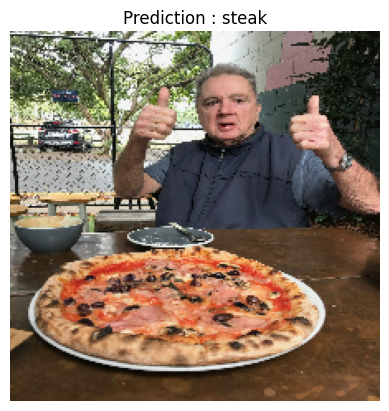

In [63]:
pred_and_plot(model_7,"/content/drive/MyDrive/Data/03-pizza-dad.jpeg")

# Multi-class Image Classification

We have just been through a bunch of the following steps with a binary classification problem, now we are going to step things up a notch with 10 classes of food

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model start with a baseline
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [64]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-09-03 15:05:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   234MB/s    in 2.1s    

2023-09-03 15:05:56 (234 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [65]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data.zip"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [66]:
# Set up the train and test directoires
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [67]:
# Let's get the class names
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape : (384, 512, 3)


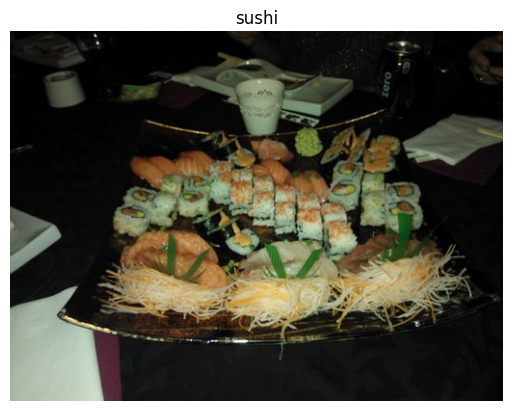

In [68]:
# Visualize, Visualize, Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)



In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation # we can use seperate activation layer but the same thing

# Create our model
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(), # default pool_size=2
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(10,activation="softmax") # change to have 10 output neurons and use softmax
])

# Compile the model
model_8.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


## 4. Fit the model

In [74]:
# fit the model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 39s 151ms/step - loss: 2.1912 - accuracy: 0.1932 - val_loss: 2.0749 - val_accuracy: 0.2444
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 1.7506 - accuracy: 0.4076 - val_loss: 2.0118 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 29s 122ms/step - loss: 0.8028 - accuracy: 0.7488 - val_loss: 2.7180 - val_accuracy: 0.2620
Epoch 4/5
235/235 [==============================] - 30s 128ms/step - loss: 0.1565 - accuracy: 0.9589 - val_loss: 4.5738 - val_accuracy: 0.2380
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.0369 - accuracy: 0.9912 - val_loss: 5.7296 - val_accuracy: 0.2184


## 5. Evaluate the model

In [75]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 5.7296 - accuracy: 0.2184


[5.729611873626709, 0.2184000015258789]

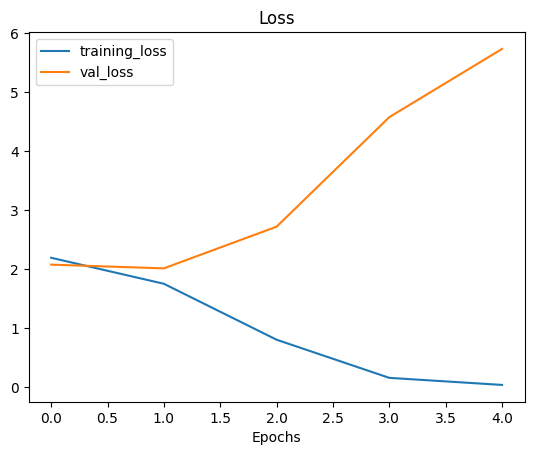

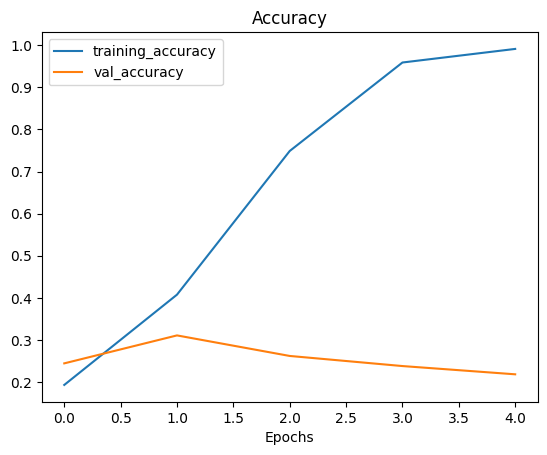

In [76]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us ?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it getting results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it is clear that our model is learning something...

However, it is not generalizing well to unseen data.

Therfore, let's try and fix overfitting by...

* **Get more data** - having more data gives a model opportunity to learn diverse patterns

* **Simplify the model** - if our model is overfitting the data, it may be too complicates of a model, one way to simplify a model is to: reduce the number of layers or reduce  the numbver of hidden units

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)

* **Use transfer leraning** - transfer learning leverages the patterns another model has learnt on similar data to your own and allows you to use those patterns on your own dataset


In [77]:
# How about we try and simplify the model first ?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(), # default pool_size=2
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # change to have 10 output neurons and use softmax
])

# Compile the model
model_9.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

# fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )


Epoch 1/5
235/235 [==============================] - 28s 114ms/step - loss: 2.3171 - accuracy: 0.1981 - val_loss: 2.0176 - val_accuracy: 0.2812
Epoch 2/5
235/235 [==============================] - 26s 113ms/step - loss: 1.9059 - accuracy: 0.3480 - val_loss: 1.8984 - val_accuracy: 0.3320
Epoch 3/5
235/235 [==============================] - 35s 150ms/step - loss: 1.6582 - accuracy: 0.4481 - val_loss: 1.9368 - val_accuracy: 0.3236
Epoch 4/5
235/235 [==============================] - 36s 153ms/step - loss: 1.3006 - accuracy: 0.5753 - val_loss: 2.0894 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 32s 137ms/step - loss: 0.8836 - accuracy: 0.7236 - val_loss: 2.4707 - val_accuracy: 0.2920


In [78]:
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [79]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like our "simplifying the model" experiment did not work.
* the accuracy wnet down and overfitting continued

How about we try data augmentation

## Trying to reduce overfitting with data augmentation

Let'S try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [80]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   )

Found 7500 images belonging to 10 classes.


In [84]:
# Let's create another model but this time we will fit it on the augmented training data of 10 classes
model_10=tf.keras.models.clone_model(model_8)

# compile the cloned model (using the same setup as previous models)
model_10.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


In [85]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [86]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [87]:
# fit the model
history_10 = model_10.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 118s 494ms/step - loss: 2.3199 - accuracy: 0.1052 - val_loss: 2.2880 - val_accuracy: 0.1248
Epoch 2/5
235/235 [==============================] - 116s 494ms/step - loss: 2.2914 - accuracy: 0.1271 - val_loss: 2.2807 - val_accuracy: 0.1500
Epoch 3/5
235/235 [==============================] - 106s 451ms/step - loss: 2.2727 - accuracy: 0.1485 - val_loss: 2.1996 - val_accuracy: 0.2072
Epoch 4/5
235/235 [==============================] - 104s 443ms/step - loss: 2.2103 - accuracy: 0.1881 - val_loss: 2.0986 - val_accuracy: 0.2512
Epoch 5/5
235/235 [==============================] - 108s 460ms/step - loss: 2.1464 - accuracy: 0.2244 - val_loss: 2.1170 - val_accuracy: 0.2404


In [88]:
model_8.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 5.7296 - accuracy: 0.2184


[5.729612350463867, 0.2184000015258789]

In [89]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 2.1170 - accuracy: 0.2404


[2.117022752761841, 0.24040000140666962]

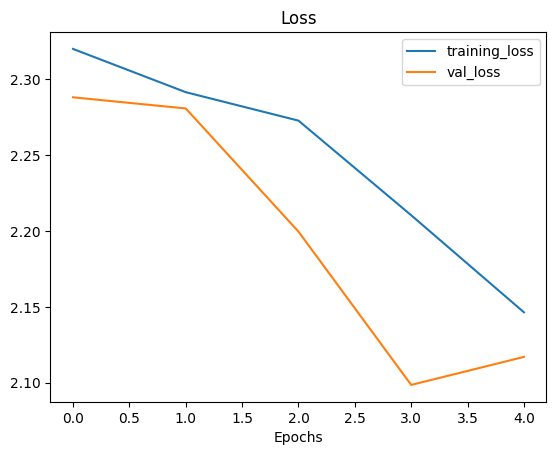

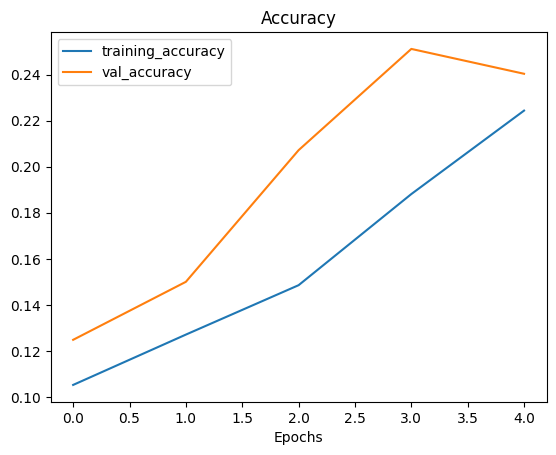

In [90]:
# Check out our model trained on augmented data'S loss curve
plot_loss_curves(history_10)

## 7. Repeat until satisfied

We could kee going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How ?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers/hidden unnits)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparamters in our ImageDataGenerator instance)
- training for longer
- try **transfer learning**

## Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images

In [92]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [94]:
# Reconfig pred_and_plot function to work with multi_class images

In [105]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots
  the image with the predicted class as title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Add in logic for multi-class & get pred_class_name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

In [106]:
# get sample images
pizza = "/content/drive/MyDrive/Data/03-pizza-dad.jpeg"
steak = "/content/drive/MyDrive/Data/03-steak.jpeg"
hmbrg="/content/drive/MyDrive/Data/03-hamburger.jpeg"
sushi="/content/drive/MyDrive/Data/03-sushi.jpeg"

1/1 [==============================] - 0s 28ms/step


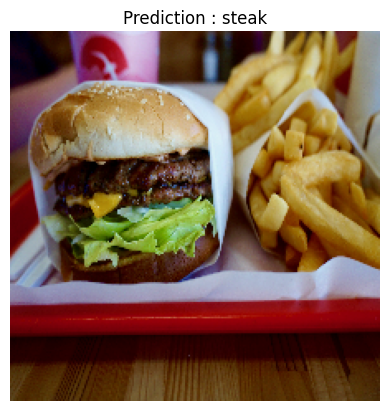

In [109]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename=hmbrg,
              class_names=class_names
              )

Looks like our model did not perform very well on our custom images but this because it only achieved 39% accuracy on the test data. Therfore, we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [111]:
# save a model
model_10.save("saved_trained_model_10")

In [112]:
# Load in a trained model and evalaute it
loaded_model_10 = tf.keras.models.load_model("/content/saved_trained_model_10")
loaded_model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [113]:
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 9s 107ms/step - loss: 2.1170 - accuracy: 0.2404


[2.11702299118042, 0.24040000140666962]

In [114]:
# compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 8s 101ms/step - loss: 2.1170 - accuracy: 0.2404


[2.1170220375061035, 0.24040000140666962]